In [53]:
#importing libraries

import shutup; shutup.please()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import re
import spacy
from collections import  Counter
import fasttext
import fasttext.util
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
from wordcloud import WordCloud
from sentence_transformers import SentenceTransformer
import sys
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.65 ms (started: 2022-03-03 16:13:36 +05:30)


In [54]:
#read the data
data=pd.read_csv("Comments.csv")
data.head()

,COMMENT
0,I am able to go to them with a problem and the...
1,Immediately responds to concerns and follows u...
2,My manager always listens to my concerns and i...
3,"She allows time to hear out my challenges, and..."
4,"Weekly meetings, very responsive"


time: 248 ms (started: 2022-03-03 16:13:36 +05:30)


In [55]:
#number of rows and columns
data.shape

(98656, 1)

time: 1.97 ms (started: 2022-03-03 16:13:36 +05:30)


In [56]:
#columns of the data
data.columns

Index(['COMMENT'], dtype='object')

time: 93.7 ms (started: 2022-03-03 16:13:36 +05:30)


In [57]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98656 entries, 0 to 98655
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COMMENT  98656 non-null  object
dtypes: object(1)
memory usage: 770.9+ KB
time: 133 ms (started: 2022-03-03 16:13:36 +05:30)


In [58]:
#checking for any duplicates
any(data['COMMENT'].duplicated())

True

time: 110 ms (started: 2022-03-03 16:13:37 +05:30)


In [59]:
#data description
data.describe()

,COMMENT
count,98656
unique,89517
top,Nothing
freq,360


time: 155 ms (started: 2022-03-03 16:13:37 +05:30)


In [60]:
#to find any NULL values in dataset
data.isnull()

,COMMENT
0,False
1,False
2,False
3,False
4,False
...,...
98651,False
98652,False
98653,False
98654,False


time: 94.1 ms (started: 2022-03-03 16:13:37 +05:30)


In [61]:
#dropping NULL values
data.isnull().sum

data=data.dropna(how='any', axis=0)

time: 86.4 ms (started: 2022-03-03 16:13:37 +05:30)


In [62]:
#converting lines into lowercase
data['COMMENT']=data['COMMENT'].apply(lambda x: x.lower())

time: 128 ms (started: 2022-03-03 16:13:37 +05:30)


In [63]:
stopwords = nltk.corpus.stopwords.words('english')    

time: 51.2 ms (started: 2022-03-03 16:13:37 +05:30)


In [64]:
#contractions dictionary
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would",  "i'd": "I would","I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have","i'm": "I am","i've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

time: 90.4 ms (started: 2022-03-03 16:13:37 +05:30)


In [65]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

time: 123 ms (started: 2022-03-03 16:13:37 +05:30)


In [66]:
data['COMMENT']=data['COMMENT'].apply(lambda x: expand_contractions(x))


time: 1.87 s (started: 2022-03-03 16:13:37 +05:30)


In [67]:
#function for removing punctuations
def remove_punctuations(text):
    nopunctuation="".join([i for i in text if i not in string.punctuation])
    return nopunctuation

time: 444 µs (started: 2022-03-03 16:13:39 +05:30)


In [68]:
data['COMMENT']=data['COMMENT'].apply(lambda x: remove_punctuations(x))

time: 858 ms (started: 2022-03-03 16:13:39 +05:30)


In [69]:
#removing stopwords
data['COMMENT']=data['COMMENT'].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords]))

time: 2.3 s (started: 2022-03-03 16:13:40 +05:30)


In [70]:
#removing digits
data['COMMENT']=data['COMMENT'].str.replace('\d+', '')

time: 151 ms (started: 2022-03-03 16:13:42 +05:30)


In [71]:
data.to_csv("comments.csv", index=False)

time: 180 ms (started: 2022-03-03 16:13:43 +05:30)


## FastText

In [72]:
#train model using fasttext
model=fasttext.train_unsupervised('comments.csv')
model

Read 0M words
Number of words:  5767
Number of labels: 0
Progress: 100.0% words/sec/thread:  102984 lr:  0.000148 avg.loss:  2.468875 ETA:   0h 0m 0s

time: 16.2 s (started: 2022-03-03 16:13:43 +05:30)


Progress: 100.0% words/sec/thread:  102983 lr:  0.000000 avg.loss:  2.468773 ETA:   0h 0m 0s


In [73]:
#unique words from comments
unique_words=[i for i in model.words if i not in stopwords]

time: 60.4 ms (started: 2022-03-03 16:13:59 +05:30)


In [74]:
#function to generate fasttext embeddings for words 
def fasttext_word_vec(data,column):
    ft_dict={}
    for word in unique_words:
        ft_dict[word]=model.get_word_vector(word)
            
    return ft_dict

time: 28.1 ms (started: 2022-03-03 16:13:59 +05:30)


In [75]:
#unique words and  corresponding vectors dataframe
word_vec_df=pd.DataFrame(fasttext_word_vec(data,column='COMMENT').items(), columns=['words','vectors_arr'])
word_vec_df

,words,vectors_arr
0,</s>,"[0.098409556, 0.29535544, -0.35448858, -0.0912..."
1,concerns,"[-0.16684115, 0.7171776, -0.43427658, -0.29915..."
2,manager,"[-0.08016529, 0.18321684, -0.40401033, -0.1793..."
3,always,"[0.101122685, 0.34078708, -0.33128956, -0.0848..."
4,listens,"[0.08118457, -0.027572047, -0.12802024, 0.0067..."
...,...,...
5758,investigation,"[-0.066696994, 0.27741623, 0.14229912, 0.08219..."
5759,grant,"[0.04411043, 0.35903412, -0.24091455, 0.124407..."
5760,uw,"[0.09652239, 0.15032442, -0.050168093, -0.0419..."
5761,transformation,"[0.037629757, 0.269774, 0.054032434, -0.044714..."


time: 224 ms (started: 2022-03-03 16:13:59 +05:30)


In [76]:
split_sent_df= pd.DataFrame(word_vec_df['vectors_arr'].tolist())
word_vec_df=pd.concat([word_vec_df,split_sent_df], axis=1)

time: 144 ms (started: 2022-03-03 16:13:59 +05:30)


In [77]:
word_vec_df=word_vec_df.drop('vectors_arr',axis=1)

time: 4.11 ms (started: 2022-03-03 16:14:00 +05:30)


In [78]:
word_vec_df

,words,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,</s>,0.098410,0.295355,-0.354489,-0.091246,0.083743,0.142644,0.261215,-0.051419,0.212616,...,0.305175,0.035360,0.334548,-0.399574,-0.045356,-0.042902,-0.045638,-0.071175,0.128162,0.064118
1,concerns,-0.166841,0.717178,-0.434277,-0.299157,-0.031741,0.314860,0.286527,-0.623765,-0.087188,...,0.358414,0.083293,0.343854,-0.048057,-0.183007,-0.207342,-0.214728,-0.274083,0.371207,-0.075572
2,manager,-0.080165,0.183217,-0.404010,-0.179399,0.201390,-0.090550,0.092451,-0.260662,0.026822,...,0.247335,0.090846,0.658994,-0.191073,-0.228145,-0.166084,-0.164595,-0.118747,0.272456,-0.021717
3,always,0.101123,0.340787,-0.331290,-0.084863,-0.046370,0.114049,0.282473,-0.176046,0.331529,...,0.030221,0.044507,0.072781,-0.322192,-0.234579,0.046749,0.389490,-0.070734,0.200140,-0.086527
4,listens,0.081185,-0.027572,-0.128020,0.006763,0.551569,0.176215,0.548103,-0.295684,0.211297,...,0.477270,-0.474432,0.744469,-0.332692,-0.708594,-0.065262,-0.033474,-0.353786,0.267601,-0.559981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,investigation,-0.066697,0.277416,0.142299,0.082196,-0.049156,0.111380,0.033446,0.054587,0.049058,...,0.258328,-0.053065,0.396162,-0.144174,-0.049735,-0.403626,0.035590,-0.016201,-0.033578,0.034473
5759,grant,0.044110,0.359034,-0.240915,0.124408,-0.158003,-0.060744,0.221983,0.009956,0.139744,...,-0.004731,0.151117,0.292731,-0.066669,-0.171286,-0.160110,0.053241,-0.004113,-0.071712,0.130970
5760,uw,0.096522,0.150324,-0.050168,-0.041900,-0.069129,-0.053619,0.122138,0.055151,0.258687,...,0.223297,0.092766,0.386831,-0.063524,0.112620,-0.366072,0.157555,-0.005327,-0.082123,0.154548
5761,transformation,0.037630,0.269774,0.054032,-0.044715,0.157080,0.004318,0.137038,-0.010358,0.333372,...,0.282738,0.000034,0.181412,-0.275097,0.104471,-0.667970,0.016626,-0.223745,-0.128125,-0.020995


time: 125 ms (started: 2022-03-03 16:14:00 +05:30)


## 50% of values

In [79]:
#standardizing the data
#to convert mean=0 and variance=1
sc_x=StandardScaler()
X_train=sc_x.fit_transform(word_vec_df.iloc[:, 1:])

time: 69.1 ms (started: 2022-03-03 16:14:00 +05:30)


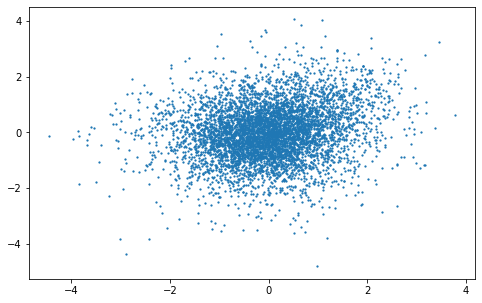

time: 170 ms (started: 2022-03-03 16:14:00 +05:30)


In [80]:
#distribution of points in standardized data
plt.figure(figsize=(8,5))
plt.scatter(X_train[:, 0], X_train[:, 1],s=1.5)

In [81]:
#calculate the covariance matrix
np.cov(X_train.T)

array([[ 1.00017356,  0.18740856, -0.05365199, ..., -0.35212257,
        -0.09513596,  0.23117489],
       [ 0.18740856,  1.00017356, -0.24306279, ..., -0.08357401,
         0.00628578, -0.02654738],
       [-0.05365199, -0.24306279,  1.00017356, ...,  0.18511649,
        -0.20732324,  0.10239727],
       ...,
       [-0.35212257, -0.08357401,  0.18511649, ...,  1.00017355,
         0.04471024, -0.03581653],
       [-0.09513596,  0.00628578, -0.20732324, ...,  0.04471024,
         1.00017355, -0.2729789 ],
       [ 0.23117489, -0.02654738,  0.10239727, ..., -0.03581653,
        -0.2729789 ,  1.00017354]])

time: 12.6 ms (started: 2022-03-03 16:14:00 +05:30)


In [82]:
#finding cov matrix using (X^T * X)/n-1
cov_mat=np.matmul(X_train.T, X_train)
cov_mat=cov_mat/(len(X_train)-1)

print(cov_mat.shape)
cov_mat

(100, 100)


array([[ 1.0001737 ,  0.18740857, -0.05365197, ..., -0.35212255,
        -0.09513595,  0.2311749 ],
       [ 0.18740857,  1.0001736 , -0.24306278, ..., -0.08357401,
         0.00628578, -0.02654737],
       [-0.05365197, -0.24306278,  1.0001734 , ...,  0.18511651,
        -0.20732325,  0.10239728],
       ...,
       [-0.35212255, -0.08357401,  0.18511651, ...,  1.0001733 ,
         0.04471025, -0.03581653],
       [-0.09513595,  0.00628578, -0.20732325, ...,  0.04471025,
         1.0001737 , -0.27297893],
       [ 0.2311749 , -0.02654737,  0.10239728, ..., -0.03581653,
        -0.27297893,  1.0001737 ]], dtype=float32)

time: 64.2 ms (started: 2022-03-03 16:14:00 +05:30)


In [83]:
# calculating top 50 eigen values and eigen vectors 
eig_vals, eig_vecs = eigh(cov_mat, eigvals=(50,99)) 

time: 78.7 ms (started: 2022-03-03 16:14:00 +05:30)


In [84]:
print(eig_vals.shape)
eig_vals

(50,)


array([0.33080143, 0.33448392, 0.39139533, 0.39858586, 0.42685205,
       0.44819486, 0.46058303, 0.49168688, 0.49647897, 0.52609146,
       0.5469496 , 0.59995115, 0.6207685 , 0.6540878 , 0.70685434,
       0.74523044, 0.7859583 , 0.83352494, 0.8720107 , 0.9076154 ,
       0.98472285, 1.0294338 , 1.0873443 , 1.1365923 , 1.1631057 ,
       1.235737  , 1.2782274 , 1.3557199 , 1.4756864 , 1.5405935 ,
       1.5854334 , 1.6424385 , 1.7705618 , 1.8221191 , 1.9508537 ,
       1.9906646 , 2.1481886 , 2.1884594 , 2.4826488 , 2.6724067 ,
       2.9101467 , 3.1473093 , 3.5694966 , 3.8245401 , 4.356248  ,
       4.720946  , 5.7788086 , 7.144087  , 7.4709435 , 9.190685  ],
      dtype=float32)

time: 60.5 ms (started: 2022-03-03 16:14:00 +05:30)


In [105]:
print("original shape of eigen vectors={}".format(eig_vecs.shape))


original shape of eigen vectors=(50, 100)
time: 1.87 ms (started: 2022-03-03 16:23:04 +05:30)


In [86]:
eig_vecs=eig_vecs.T
print("Tramsformed shape of eigen vectors=",eig_vecs.shape)
eig_vecs

Tramsformed shape of eigen vectors= (50, 100)


array([[ 0.07155796, -0.07125466, -0.02540239, ...,  0.25339833,
         0.02498961, -0.11501482],
       [ 0.15023062,  0.22663438, -0.13314715, ...,  0.03205214,
         0.15219076, -0.13953757],
       [ 0.12730297, -0.0125118 , -0.00332731, ...,  0.03127911,
        -0.1090846 , -0.00283716],
       ...,
       [-0.12227802,  0.0152736 , -0.09417886, ...,  0.11493611,
        -0.03001929, -0.03261123],
       [ 0.0027159 ,  0.14291531, -0.08282866, ..., -0.11069533,
         0.08590381, -0.17017823],
       [ 0.04044911,  0.06909077, -0.14582671, ..., -0.03075965,
        -0.03439069,  0.13611692]], dtype=float32)

time: 79.8 ms (started: 2022-03-03 16:14:00 +05:30)


In [87]:
#constructing projection matrix of reduced dimensions than original data dimensions

new_dim=np.matmul(eig_vecs, X_train.T)
print("new dimensions={}", eig_vecs.shape, " X ", X_train.T.shape," = ", new_dim.shape)

new dimensions={} (50, 100)  X  (100, 5763)  =  (50, 5763)
time: 63.3 ms (started: 2022-03-03 16:14:00 +05:30)


In [88]:
new_space=np.vstack((new_dim)).T


time: 94.5 ms (started: 2022-03-03 16:14:00 +05:30)


In [89]:
pca_50_df=pd.DataFrame(data=new_space)


time: 85.7 ms (started: 2022-03-03 16:14:01 +05:30)


In [90]:
#new dataframe with reduced dimensions
pca_50_df=pca_50_df.join(word_vec_df['words'])
pca_50_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,words
0,0.795454,-0.080657,-0.679516,-0.325346,-0.428026,0.395550,-1.380499,0.136224,3.371299,-1.052339,...,0.044141,0.697909,-0.238333,-0.633476,-1.268450,-0.851428,0.182588,3.554595,-1.453534,</s>
1,-1.364145,-0.363954,-2.439528,0.075078,1.595517,0.470382,-0.543525,0.250850,3.530085,-2.117711,...,1.182844,1.412439,-0.822047,-0.564851,1.211479,-2.595299,0.822644,7.864319,0.140363,concerns
2,-1.772371,-0.525134,-0.815066,-0.240597,-0.661990,-2.153598,-0.683825,0.055544,1.162166,-1.418628,...,0.381151,3.797590,-1.127174,-1.668221,0.824361,-4.060858,0.668311,3.116752,-0.716028,manager
3,1.100009,-0.401941,0.661923,0.104165,0.472410,-0.722561,-0.802494,0.038952,1.197374,-0.270880,...,-2.024161,2.528863,0.250666,-0.327563,-3.042073,-2.671279,3.930485,4.521279,-3.795922,always
4,-0.175132,0.031319,-0.501978,-2.349520,1.232495,3.126435,4.245151,1.950989,-0.018283,0.663727,...,-0.053751,-2.624701,0.783764,1.625562,-1.407971,-6.401375,2.474667,5.526501,-6.868358,listens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,0.121544,0.089740,-0.314840,-0.056634,0.027093,-0.179303,0.297193,-0.217738,0.441445,-0.243014,...,1.674411,-0.239416,-0.102485,1.898818,-0.202461,-0.867213,-1.242619,0.566614,-0.571843,investigation
5759,-0.082146,-0.138613,0.224822,-0.029645,-0.023916,0.091769,-0.350360,-0.023612,0.107812,0.854261,...,-1.876045,0.670623,0.248289,-0.468486,-0.237147,-2.552661,2.337683,-0.456159,3.114708,grant
5760,0.162785,0.001710,0.033608,0.049925,-0.121948,-0.052372,0.007521,0.016245,-0.043811,-0.029137,...,-0.569517,-0.470445,-0.838523,-0.358853,1.092231,0.941921,0.260851,-2.170136,1.879920,uw
5761,0.315821,0.475601,-0.471446,-0.152475,0.434555,-0.453833,-0.086063,0.162502,-0.821286,-1.350500,...,0.026267,-1.224397,-1.903695,-1.826647,1.205461,0.294374,-2.715580,0.300467,0.824685,transformation


time: 167 ms (started: 2022-03-03 16:14:01 +05:30)


In [91]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_50_df.iloc[:,:50])
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 19time: 25.3 s (started: 2022-03-03 16:14:01 +05:30)


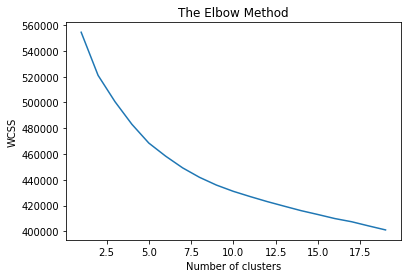

time: 107 ms (started: 2022-03-03 16:14:26 +05:30)


In [92]:
#elbowplot for optimal clusters
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

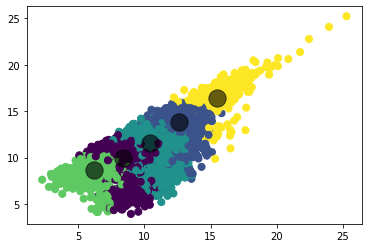

time: 1.59 s (started: 2022-03-03 16:14:26 +05:30)


In [93]:
#Scatterplot of clusters and centroids of each cluster
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
ft_kmeans = kmeans.fit_transform(pca_50_df.iloc[:,:50])
fitted=kmeans.fit(ft_kmeans)
prediction=kmeans.predict(ft_kmeans)

plt.scatter(ft_kmeans[:, 0], ft_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)
     

In [94]:
labels=kmeans.labels_
pca_50_df['labels']=labels

time: 1.12 ms (started: 2022-03-03 16:14:28 +05:30)


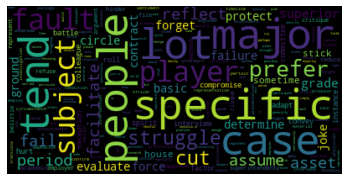

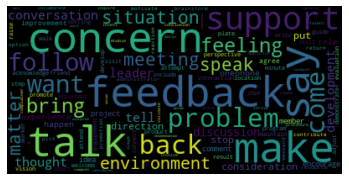

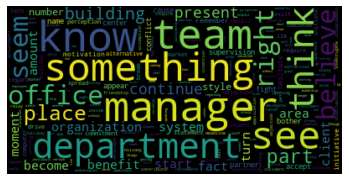

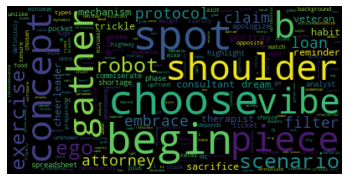

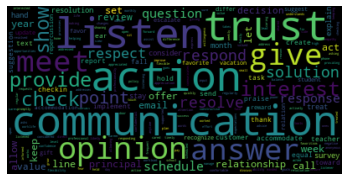

time: 1.44 s (started: 2022-03-03 16:14:28 +05:30)


In [95]:
for i in range(0,5):
    word=" ".join(line for line in pca_50_df[pca_df['labels']==i].words.values)
    WC = WordCloud(max_font_size=50, background_color="Black").generate(word)
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()

## 25% of values 

In [98]:
# calculating top 50 eigen values and eigen vectors 
eig1_vals, eig1_vecs = eigh(cov_mat, eigvals=(75,99)) 

time: 5.93 ms (started: 2022-03-03 16:19:12 +05:30)


In [100]:
print("original shape of eigen vectors={}".format(eig1_vecs.shape))
eig1_vecs

original shape of eigen vectors=(100, 25)


array([[-0.04758307, -0.16210628, -0.11720835, ..., -0.12227801,
         0.0027159 ,  0.0404491 ],
       [-0.07435207,  0.04109008, -0.01952138, ...,  0.01527363,
         0.14291532,  0.06909078],
       [ 0.20011944,  0.04497654,  0.06097764, ..., -0.09417886,
        -0.08282866, -0.14582671],
       ...,
       [-0.03591502,  0.04358906,  0.08774514, ...,  0.1149361 ,
        -0.11069533, -0.03075965],
       [ 0.18721482,  0.03160013, -0.06736038, ..., -0.03001929,
         0.08590379, -0.0343907 ],
       [ 0.08110984,  0.15724985, -0.03760943, ..., -0.03261122,
        -0.17017822,  0.13611694]], dtype=float32)

time: 8.83 ms (started: 2022-03-03 16:20:59 +05:30)


In [107]:
#generating new dimensions
new1_dim=np.matmul(eig1_vecs.T, X_train.T)
print("new dimensions={}", eig1_vecs.T.shape, " X ", X_train.T.shape," = ", new1_dim.shape)

new dimensions={} (25, 100)  X  (100, 5763)  =  (25, 5763)
time: 12.6 ms (started: 2022-03-03 16:23:34 +05:30)


In [108]:
new1_space=np.vstack((new1_dim)).T

time: 3.76 ms (started: 2022-03-03 16:24:01 +05:30)


In [109]:
pca_25_df=pd.DataFrame(data=new1_space)


time: 1.49 ms (started: 2022-03-03 16:24:33 +05:30)


In [110]:
#new dataframe with reduced dimensions
pca_25_df=pca_25_df.join(word_vec_df['words'])
pca_25_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,words
0,-0.238124,0.152051,-0.079169,1.015931,-0.356565,-0.347848,1.689409,-0.957078,0.957851,0.213492,...,0.044142,0.697909,-0.238333,-0.633476,-1.268449,-0.851428,0.182588,3.554595,-1.453535,</s>
1,1.154334,-0.941347,1.427894,-0.361385,0.902073,-0.094511,1.268685,-1.833007,2.199092,-0.224137,...,1.182845,1.412439,-0.822047,-0.564850,1.211479,-2.595299,0.822643,7.864318,0.140363,concerns
2,-0.367226,-2.511389,0.929120,0.291933,0.968288,1.190168,-1.179026,-0.608043,0.636686,-0.814220,...,0.381150,3.797591,-1.127173,-1.668221,0.824361,-4.060859,0.668311,3.116751,-0.716028,manager
3,-0.918023,-0.066905,0.316770,-0.736055,1.020844,-0.720205,-0.858558,-0.935861,-0.234413,-0.690275,...,-2.024160,2.528863,0.250666,-0.327563,-3.042073,-2.671279,3.930486,4.521279,-3.795921,always
4,-1.749453,-1.374587,-0.894607,1.332053,1.670473,2.087929,-0.290897,-0.600749,0.401189,-0.028984,...,-0.053750,-2.624701,0.783764,1.625562,-1.407971,-6.401376,2.474666,5.526501,-6.868358,listens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,-0.164975,0.945265,0.283816,-0.122821,-0.530269,0.654669,-0.625458,0.620639,-1.877604,-1.846383,...,1.674410,-0.239416,-0.102485,1.898818,-0.202461,-0.867213,-1.242618,0.566614,-0.571843,investigation
5759,0.126669,0.507612,-0.666638,-0.503194,-1.348726,-0.773132,-1.691547,-1.360707,0.982920,-1.484827,...,-1.876045,0.670623,0.248289,-0.468485,-0.237147,-2.552661,2.337682,-0.456159,3.114709,grant
5760,0.100470,-0.167105,-0.108421,0.071127,0.152730,0.047907,0.442060,-0.529529,-0.300417,-0.015880,...,-0.569517,-0.470445,-0.838523,-0.358853,1.092231,0.941920,0.260851,-2.170136,1.879920,uw
5761,-0.712080,-0.061784,-0.565654,-1.157688,0.498429,0.709239,-0.294514,-0.664421,-2.848900,-0.544277,...,0.026267,-1.224397,-1.903695,-1.826646,1.205462,0.294374,-2.715579,0.300467,0.824685,transformation


time: 41.9 ms (started: 2022-03-03 16:25:34 +05:30)


In [121]:
wcss = []
for i in range(1, 20):
    k1means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k1means.fit(pca_25_df.iloc[:,:25])
    wcss.append(k1means.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 19time: 26.9 s (started: 2022-03-03 16:31:17 +05:30)


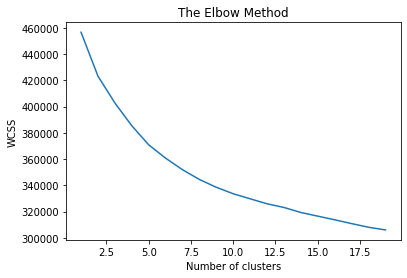

time: 112 ms (started: 2022-03-03 16:31:44 +05:30)


In [122]:
#elbowplot for optimal clusters
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

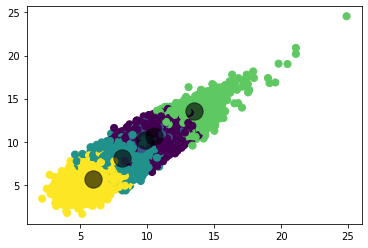

time: 1.65 s (started: 2022-03-03 16:29:53 +05:30)


In [117]:
#Scatterplot of clusters and centroids of each cluster
k1means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
ft_kmeans = k1means.fit_transform(pca_25_df.iloc[:,:25])
fitted=k1means.fit(ft_kmeans)
prediction=k1means.predict(ft_kmeans)

plt.scatter(ft_kmeans[:, 0], ft_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

In [118]:
labels=k1means.labels_
pca_25_df['labels']=labels

time: 4.79 ms (started: 2022-03-03 16:30:06 +05:30)


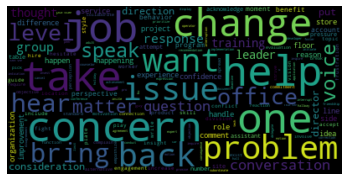

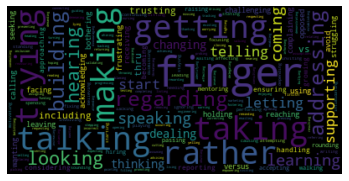

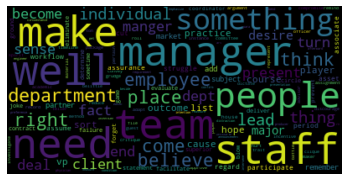

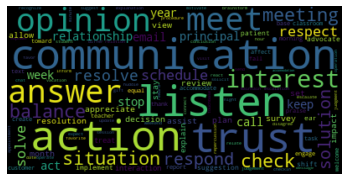

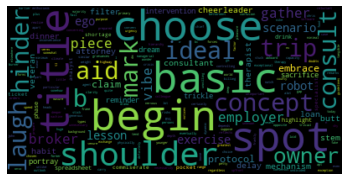

time: 1.24 s (started: 2022-03-03 16:30:46 +05:30)


In [120]:
for i in range(0,5):
    word=" ".join(line for line in pca_25_df[pca_25_df['labels']==i].words.values)
    WC = WordCloud(max_font_size=50, background_color="Black").generate(word)
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()

## 75% of values

In [123]:
# calculating top 50 eigen values and eigen vectors 
eig2_vals, eig2_vecs = eigh(cov_mat, eigvals=(25,99)) 

time: 3.87 ms (started: 2022-03-03 17:34:17 +05:30)


In [124]:
print("original shape of eigen vectors={}".format(eig2_vecs.shape))
eig2_vecs

original shape of eigen vectors=(100, 75)


array([[-0.11844753,  0.02771621,  0.21890624, ..., -0.12227803,
         0.0027159 ,  0.04044911],
       [ 0.02545993, -0.00611385,  0.03475432, ...,  0.01527354,
         0.14291531,  0.06909077],
       [ 0.14288177, -0.05137926,  0.09501009, ..., -0.09417867,
        -0.08282866, -0.14582665],
       ...,
       [-0.18207717,  0.18683778, -0.04896076, ...,  0.11493611,
        -0.11069533, -0.03075965],
       [-0.09995101, -0.06211217, -0.01130593, ..., -0.03001928,
         0.08590381, -0.0343907 ],
       [-0.08875126, -0.06994811,  0.0167093 , ..., -0.03261123,
        -0.17017823,  0.13611694]], dtype=float32)

time: 7.9 ms (started: 2022-03-03 17:34:18 +05:30)


In [125]:
#generating new dimensions
new2_dim=np.matmul(eig2_vecs.T, X_train.T)
print("new dimensions={}", eig2_vecs.T.shape, " X ", X_train.T.shape," = ", new2_dim.shape)

new dimensions={} (75, 100)  X  (100, 5763)  =  (75, 5763)
time: 4.34 ms (started: 2022-03-03 17:34:48 +05:30)


In [126]:
new2_space=np.vstack((new2_dim)).T

time: 4.18 ms (started: 2022-03-03 17:36:11 +05:30)


In [127]:
pca_75_df=pd.DataFrame(data=new2_space)

time: 1.41 ms (started: 2022-03-03 17:36:14 +05:30)


In [128]:
#new dataframe with reduced dimensions
pca_75_df=pca_75_df.join(word_vec_df['words'])
pca_75_df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,words
0,-1.133965,-0.754130,-0.769063,0.583747,0.184480,0.059430,-0.337222,-0.360500,1.866159,-0.103721,...,0.044142,0.697909,-0.238333,-0.633476,-1.268449,-0.851428,0.182588,3.554595,-1.453535,</s>
1,0.091452,0.512301,-0.372544,-0.388389,-1.158817,0.755471,-0.804180,0.449086,-0.430090,0.619741,...,1.182845,1.412438,-0.822047,-0.564850,1.211479,-2.595299,0.822643,7.864319,0.140363,concerns
2,0.075059,-0.221256,-0.336084,-0.721262,0.536195,-0.344935,0.439964,0.300229,0.402570,-0.091969,...,0.381151,3.797590,-1.127173,-1.668221,0.824361,-4.060859,0.668310,3.116752,-0.716029,manager
3,-0.111112,0.215169,-0.387677,0.824565,0.368974,0.194039,0.281318,-0.015280,0.190087,-0.173875,...,-2.024160,2.528863,0.250665,-0.327563,-3.042073,-2.671279,3.930485,4.521279,-3.795922,always
4,0.088512,0.171533,-0.859529,-0.216086,0.700157,0.453336,-0.280702,0.294888,0.061657,1.144186,...,-0.053750,-2.624701,0.783764,1.625562,-1.407971,-6.401376,2.474665,5.526501,-6.868360,listens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,-0.007733,-0.072363,-0.109879,0.103835,-0.144146,0.002574,0.260269,0.014116,-0.030891,0.372915,...,1.674411,-0.239415,-0.102485,1.898818,-0.202461,-0.867213,-1.242618,0.566614,-0.571843,investigation
5759,0.078326,-0.145317,0.116863,0.167406,-0.202253,-0.295088,0.337655,-0.099263,-0.099332,-0.099587,...,-1.876045,0.670623,0.248289,-0.468485,-0.237147,-2.552661,2.337682,-0.456159,3.114709,grant
5760,-0.005790,0.010261,-0.003096,0.011259,-0.014254,-0.072479,-0.051100,0.008109,0.044571,0.033061,...,-0.569517,-0.470445,-0.838523,-0.358853,1.092231,0.941921,0.260851,-2.170136,1.879920,uw
5761,-0.088604,-0.000600,0.077297,0.284484,-0.094858,0.095069,0.102646,-0.029486,0.238621,-0.031000,...,0.026268,-1.224397,-1.903695,-1.826646,1.205461,0.294374,-2.715579,0.300467,0.824685,transformation


time: 43.4 ms (started: 2022-03-03 17:36:14 +05:30)


In [129]:
wcss = []
for i in range(1, 20):
    k2means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k2means.fit(pca_75_df.iloc[:,:25])
    wcss.append(k2means.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 19time: 26.1 s (started: 2022-03-03 17:36:44 +05:30)


In [ ]:
#elbowplot for optimal clusters
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

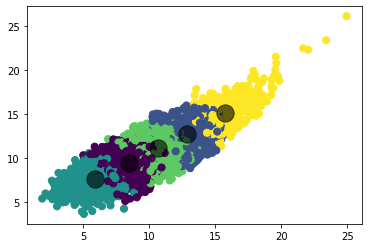

time: 1.75 s (started: 2022-03-03 17:37:43 +05:30)


In [130]:
#Scatterplot of clusters and centroids of each cluster
k2means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
ft_kmeans = k2means.fit_transform(pca_75_df.iloc[:,:75])
fitted=k2means.fit(ft_kmeans)
prediction=k2means.predict(ft_kmeans)

plt.scatter(ft_kmeans[:, 0], ft_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

In [132]:
labels=k2means.labels_
pca_75_df['labels']=labels

time: 2.47 ms (started: 2022-03-03 17:38:06 +05:30)


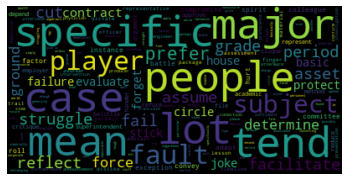

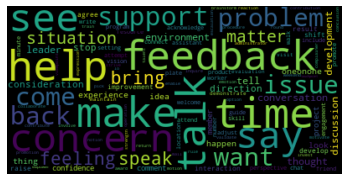

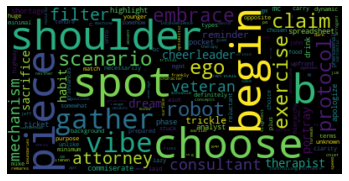

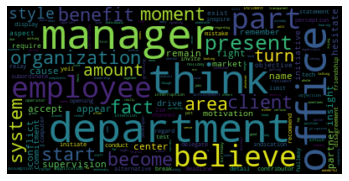

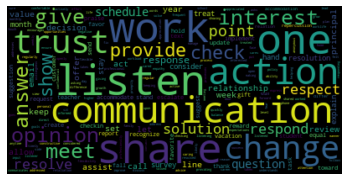

time: 1.41 s (started: 2022-03-03 17:38:21 +05:30)


In [133]:
for i in range(0,5):
    word=" ".join(line for line in pca_75_df[pca_75_df['labels']==i].words.values)
    WC = WordCloud(max_font_size=50, background_color="Black").generate(word)
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()

## 90% of values

In [134]:
# calculating top 10 eigen values and eigen vectors 
eig3_vals, eig3_vecs = eigh(cov_mat, eigvals=(90,99)) 

time: 1.44 ms (started: 2022-03-03 19:00:59 +05:30)


In [136]:
print("original shape of eigen vectors={}".format(eig3_vecs.shape))
eig3_vecs

original shape of eigen vectors=(100, 10)


array([[-4.63323928e-02, -1.41934812e-01,  4.98204418e-02,
        -2.20623642e-01,  1.24352761e-01, -1.85085446e-01,
         9.89306048e-02, -1.22278027e-01,  2.71589984e-03,
         4.04491015e-02],
       [-1.57318696e-01,  8.16466138e-02, -8.83026272e-02,
         3.52747738e-02,  4.92995679e-02, -1.39150172e-01,
         8.12770426e-02,  1.52736008e-02,  1.42915294e-01,
         6.90907836e-02],
       [ 1.05517402e-01, -1.04752801e-01, -1.58025965e-01,
         1.93353668e-02,  5.46229370e-02,  6.15252592e-02,
         1.56693012e-01, -9.41788554e-02, -8.28286409e-02,
        -1.45826712e-01],
       [-1.04695342e-01,  1.09092899e-01,  1.48649635e-02,
         6.43314123e-02,  1.55033931e-01,  4.55291979e-02,
        -1.24291845e-01,  3.04360734e-03, -1.43706128e-01,
         8.17217827e-02],
       [ 1.44877192e-02,  1.20393679e-01, -2.95258518e-02,
         1.23612480e-02, -2.05128491e-01, -3.69286686e-02,
         1.53845511e-02, -6.39031306e-02, -3.92367207e-02,
        -1.

time: 9.95 ms (started: 2022-03-03 19:01:04 +05:30)


In [137]:
#generating new dimensions
new3_dim=np.matmul(eig3_vecs.T, X_train.T)
print("new dimensions={}", eig3_vecs.T.shape, " X ", X_train.T.shape," = ", new3_dim.shape)

new dimensions={} (10, 100)  X  (100, 5763)  =  (10, 5763)
time: 11.2 ms (started: 2022-03-03 19:01:21 +05:30)


In [138]:
new3_space=np.vstack((new3_dim)).T

time: 1.05 ms (started: 2022-03-03 19:01:30 +05:30)


In [139]:
pca_10_df=pd.DataFrame(data=new3_space)

time: 513 µs (started: 2022-03-03 19:01:38 +05:30)


In [140]:
#new dataframe with reduced dimensions
pca_10_df=pca_10_df.join(word_vec_df['words'])
pca_10_df

,0,1,2,3,4,5,6,7,8,9,words
0,-0.183414,0.044141,0.697909,-0.238333,-0.633476,-1.268449,-0.851428,0.182588,3.554596,-1.453534,</s>
1,-1.034500,1.182844,1.412439,-0.822047,-0.564850,1.211479,-2.595299,0.822643,7.864319,0.140363,concerns
2,0.256021,0.381150,3.797590,-1.127173,-1.668221,0.824361,-4.060859,0.668310,3.116752,-0.716028,manager
3,0.233835,-2.024161,2.528863,0.250666,-0.327563,-3.042073,-2.671279,3.930486,4.521279,-3.795921,always
4,-0.985307,-0.053750,-2.624701,0.783765,1.625562,-1.407971,-6.401376,2.474666,5.526501,-6.868358,listens
...,...,...,...,...,...,...,...,...,...,...,...
5758,1.575760,1.674411,-0.239416,-0.102485,1.898818,-0.202461,-0.867213,-1.242619,0.566614,-0.571843,investigation
5759,0.387966,-1.876045,0.670623,0.248289,-0.468485,-0.237147,-2.552661,2.337682,-0.456159,3.114709,grant
5760,1.181126,-0.569517,-0.470445,-0.838524,-0.358853,1.092231,0.941920,0.260851,-2.170136,1.879920,uw
5761,2.440584,0.026267,-1.224397,-1.903695,-1.826646,1.205461,0.294374,-2.715580,0.300467,0.824685,transformation


time: 13.2 ms (started: 2022-03-03 19:01:49 +05:30)


In [141]:
wcss = []
for i in range(1, 20):
    k3means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k3means.fit(pca_10_df.iloc[:,:10])
    wcss.append(k3means.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 19time: 24.5 s (started: 2022-03-03 19:03:25 +05:30)


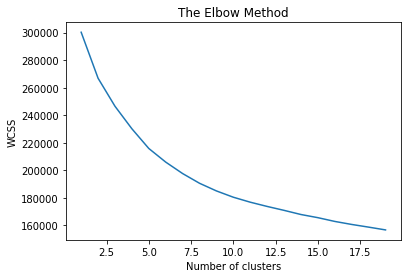

time: 120 ms (started: 2022-03-03 19:03:55 +05:30)


In [142]:
#elbowplot for optimal clusters
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

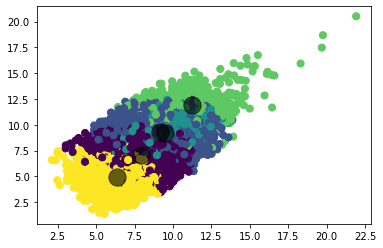

time: 1.57 s (started: 2022-03-03 19:04:01 +05:30)


In [143]:
#Scatterplot of clusters and centroids of each cluster
k3means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
ft_kmeans = k3means.fit_transform(pca_10_df.iloc[:,:10])
fitted=k3means.fit(ft_kmeans)
prediction=k3means.predict(ft_kmeans)

plt.scatter(ft_kmeans[:, 0], ft_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

In [144]:
labels=k3means.labels_
pca_10_df['labels']=labels

time: 1.16 ms (started: 2022-03-03 19:04:05 +05:30)


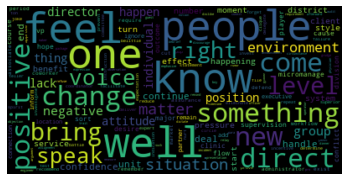

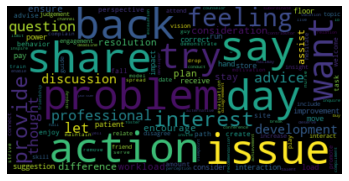

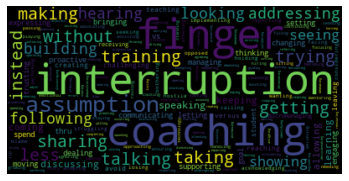

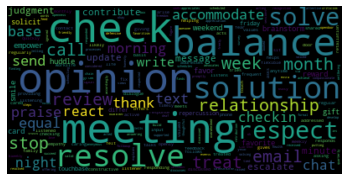

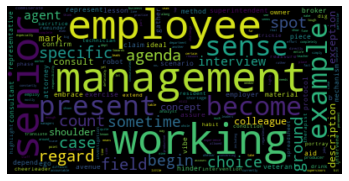

time: 1.22 s (started: 2022-03-03 19:04:08 +05:30)


In [145]:
for i in range(0,5):
    word=" ".join(line for line in pca_10_df[pca_10_df['labels']==i].words.values)
    WC = WordCloud(max_font_size=50, background_color="Black").generate(word)
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()